# Comparisons
## Nearest Neighbors
### Finding optimal parameters for reduced LSH
Our 20-dimensional encoding of the images worked exceptionally well, especially when considering the average approximation factor of all the `k-nearerest neighbors`. Our main problem was to find a set of parameters so that `LSH` in the reduced space could have a good balance of accuracy and speed, since `GNNS` (and `MRNG`, optionally) rely on it.

The latent space generally allowed for both a larger number of hashtables and a lower number of hyperplanes. In fact, while using only `3` hyperplanes was too slow and costly on the original `784` space, `3` hyperplanes were on the fast but innacurate side in our reduced space.  Since vector comparisons are much faster on it, we could push the algorithm to use only two hyperplanes and still be much faster than the original one. The hyperparameters we ended up with were the following:

* L = 8
* K = 2
* Window = 9
* TableSize = 7500
    
This combination on the reduced space is has a max factor of `1.9` compared to the original LSH but is also `3.3` times faster. 

### Graph Initializations
Both the `GNNS` and the `MRNG` initializations were significantly faster on the reduced space; `GNNS` was faster because of the faster `LSH` and `MRNG` was faster either because of the faster `LSH` or just because of the faster Eucledean distances, depending on the approach. The times for the for the `60k` dataset are shown below.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


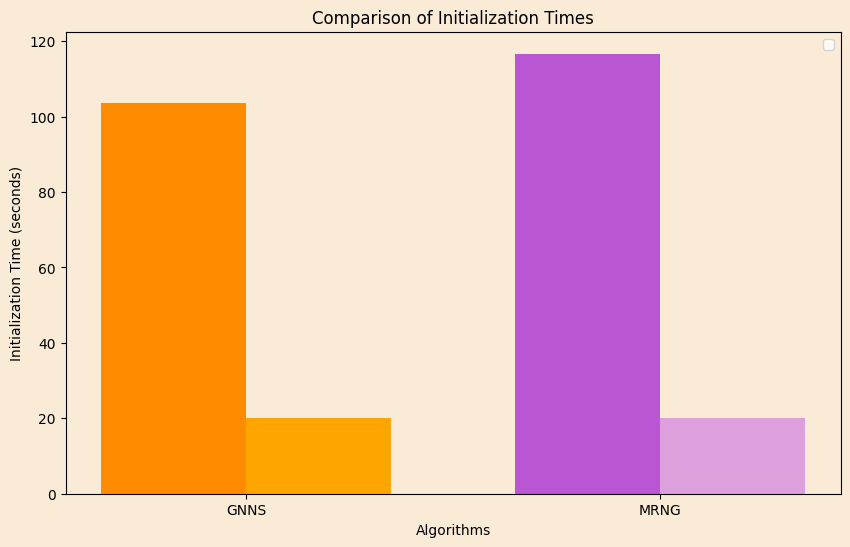

In [2]:
import matplotlib.pyplot as plt

plot_colour = 'antiquewhite'

# Data
algorithms = ['GNNS', 'MRNG']
original_times = [103.607, 116.692]
reduced_times = [20.019, 20.167]

# Bar width
bar_width = 0.35

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(plot_colour) 
ax.set_facecolor(plot_colour)

# Bar positions
original_positions = range(len(algorithms))
reduced_positions = [pos + bar_width for pos in original_positions]

# Plot bars with different colors for each step
original_bars = ax.bar(original_positions, original_times, width=bar_width, color=['darkorange','mediumorchid'])
reduced_bars = ax.bar(reduced_positions, reduced_times, width=bar_width, color=['orange','plum'])

# Add labels, title, and legend
ax.set_xlabel('Algorithms')
ax.set_ylabel('Initialization Time (seconds)')
ax.set_title('Comparison of Initialization Times')
ax.set_xticks([pos + bar_width / 2 for pos in original_positions])
ax.set_xticklabels(algorithms)
ax.legend()

# Show the plot
plt.show()


### Approximation Factors
Both `GNNS` and `MRNG` performed well on the reduced space, both halving their search time whilst virtually retaining their accuracies. The overall comparisons are shown below. Notice that the `MRNG` on the reduced space performed a bit better on average than the `MRNG` on the original one. What's also interesting, is that the reduced exhaustive search outperforms Hypercube, being both faster and more accurate.

Those test were performed on the `60k` dataset, on `5k` queries for a `10-nearest neighbor search`, with the `AAF` being the average of the approximation factors of all the nearest neighbors, then averaged for all the queries. (The code for the test is on the `src/comparisons.cpp`)

*Time of the exhaustive was approximately 10 times slower than hypercube.*

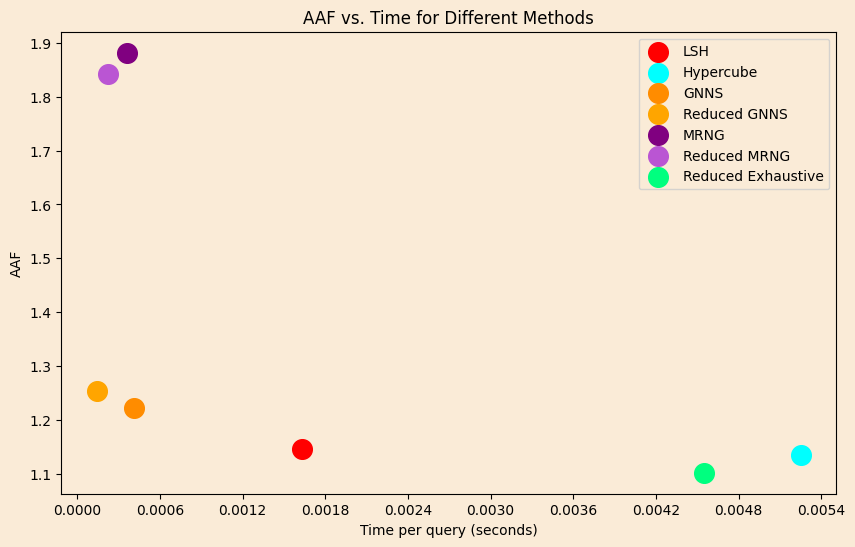

In [63]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data
methods = ['LSH', 'Hypercube', 'GNNS', 'Reduced GNNS', 'MRNG', 'Reduced MRNG', 'Reduced Exhaustive']
times = [0.001629, 0.005254, 0.000409, 0.000140, 0.000361, 0.000219, 0.004547]
aaf = [1.146147, 1.134367, 1.222639, 1.254118, 1.881976, 1.842101, 1.101598]
method_colors = ['red', 'cyan', 'darkorange', 'orange', 'purple','mediumorchid', 'springgreen']

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.set_facecolor(plot_colour) 
ax.set_facecolor(plot_colour)


# Plot points for all methods with specified colors
for i in range(len(methods)):
    ax.scatter(times[i], aaf[i], label=methods[i], color=method_colors[i], s=200)

# Add labels, title, and legend
ax.set_xlabel('Time per query (seconds)')
ax.set_ylabel('AAF')
ax.set_title('AAF vs. Time for Different Methods')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Add legend
legend = ax.legend()
# Set legend box background color
legend.get_frame().set_facecolor(plot_colour) 

# Show the plot
plt.show()


## Clustering
### General
In clustering there was indeed an improvement in the clustering time with small loss in the quality of the silhouette. In particular, we saw a `95%` improvement in the clustering time on the `20-space`, with a approximately `25%` loss in the quality of the silhouette. The value of the objective function remained identical. For the tests we run on a `5k` subset of the dataset, which we clustered `100` times, both on the original and the reduced space, averaging the times, silhouettes  and objective function values yielded. In the graph we've also added the results of our `78-space` encoding for comparison.

It's important to note here that the numbers(including some of the ratios) vary widely depending on the size of the dataset. For example, value of the objective function increases a lot when we consider a larger part of the dataset.

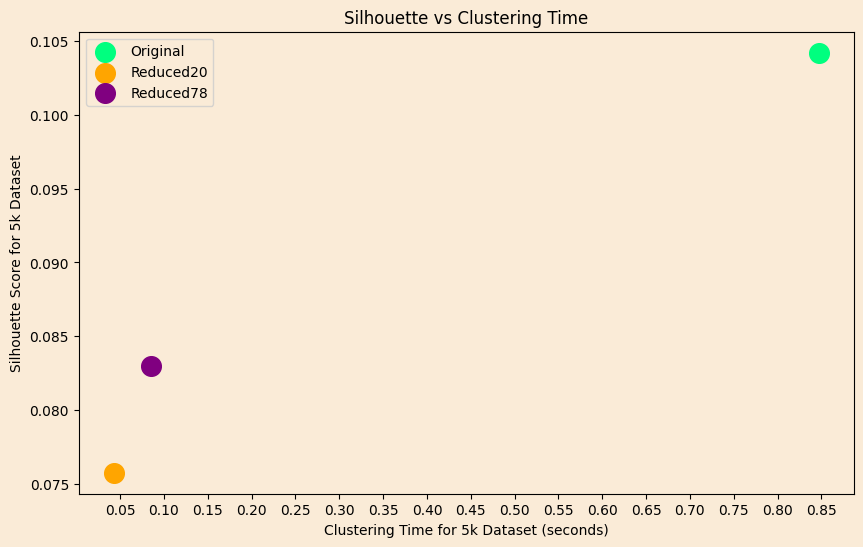

In [26]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Data
methods = ['Original', 'Reduced20', 'Reduced78']
times = [0.846728, 0.043023, 0.085387]
scores = [0.104214, 0.075744, 0.082989]
colors = ['springgreen', 'orange', 'purple']

# Scatter plot
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.set_facecolor(plot_colour) 
ax1.set_facecolor(plot_colour)

# Plot for the first graph
for i in range(len(methods)):
    ax1.scatter(times[i], scores[i], label=methods[i], color=colors[i], s=200)

# Adding labels and title for the first graph
ax1.set_xlabel('Clustering Time for 5k Dataset (seconds)')
ax1.set_ylabel('Silhouette Score for 5k Dataset')
ax1.set_title('Silhouette vs Clustering Time')

# Adding legend for the first graph
ax1.legend(methods)
legend1 = ax1.legend()
legend1.get_frame().set_facecolor(plot_colour)
ax1.xaxis.set_major_locator(MultipleLocator(0.05))


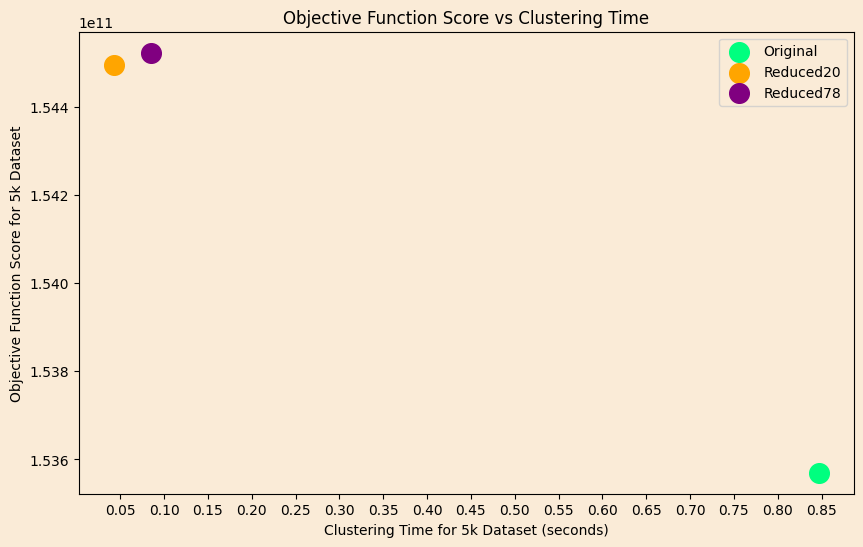

In [34]:
# Scatter plot
fig, ax2 = plt.subplots(figsize=(10, 6))
fig.set_facecolor(plot_colour) 
ax2.set_facecolor(plot_colour)

#Plot for the second graph (you need to define your second set of data)
# Example data for the second graph
objective_values = [153569751147, 154495675619, 154523977134]

# Adding labels and title for the second graph
ax2.set_xlabel('Clustering Time for 5k Dataset (seconds)')
ax2.set_ylabel('Objective Function Score for 5k Dataset')
ax2.set_title('Objective Function Score vs Clustering Time')

# Plot for the first graph
for i in range(len(methods)):
    ax2.scatter(times[i], objective_values[i], label=methods[i], color=colors[i], s=200)
    
# Adding legend for the second graph
ax2.legend()
legend2 = ax2.legend()
legend2.get_frame().set_facecolor(plot_colour)
ax2.xaxis.set_major_locator(MultipleLocator(0.05))

# Display the plot
plt.show()
